In [4]:
from Bio.PDB import PDBParser
import numpy as np
import gudhi
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch

In [5]:
def create_df(structure):
    '''creates python data frame of data from .pdb files of 3D protein structures'''
    structure_list = []
    for model in structure: 
        for chain in model:
            for residue in chain:
                for atom in residue:
                    atom_info = {
                        "Model": model.id,
                        "Chain": chain.id,
                        "Residue_Name": residue.get_resname(),
                        "Residue_ID": residue.get_id()[1],  # Sequence number
                        "Atom_Name": atom.get_name(),
                        "Element": atom.element,
                        "X": atom.coord[0],
                        "Y": atom.coord[1],
                        "Z": atom.coord[2]
                    }
                    structure_list.append(atom_info)
    df = pd.DataFrame(structure_list)
    return df

In [6]:
# Sicklecell data
parser1 = PDBParser(QUIET=True)
sicklecell = parser1.get_structure("sicklecell", "data/5e83.pdb")
sicklecell_df = create_df(sicklecell)
sicklecell_point_cloud = sicklecell_df[['X', 'Y', 'Z']].to_numpy() # create point cloud (extract 3 dim coordinates)
sicklecell_rips_complex = gudhi.RipsComplex(points=sicklecell_point_cloud, max_edge_length=8.0) # create rips
sicklecell_simplex_tree = sicklecell_rips_complex.create_simplex_tree(max_dimension=3) # create simplex
sickle_diagram = sicklecell_simplex_tree.persistence(min_persistence=0.5) # create persistence diagram

In [7]:
# deoxygenated hemiglobin data
parser2 = PDBParser(QUIET=True)
deoxy = parser2.get_structure("deoxy", "data/1a3n.pdb") # deoxy
deoxy_df = create_df(deoxy)
deoxy_point_cloud = deoxy_df[['X', 'Y', 'Z']].to_numpy()
deoxy_rips_complex = gudhi.RipsComplex(points=deoxy_point_cloud, max_edge_length=8.0)  
deoxy_simplex_tree = deoxy_rips_complex.create_simplex_tree(max_dimension=3)
deoxy_diagram = deoxy_simplex_tree.persistence(min_persistence=0.5)

In [8]:
# oxygenated hemoglobin data
parser3 = PDBParser(QUIET=True)
oxy = parser3.get_structure("oxy", "data/2hhb.pdb") # oxy
oxy_df = create_df(oxy)
oxy_point_cloud = oxy_df[['X', 'Y', 'Z']].to_numpy()
oxy_rips_complex = gudhi.RipsComplex(points=oxy_point_cloud, max_edge_length=8.0) 
oxy_simplex_tree = oxy_rips_complex.create_simplex_tree(max_dimension=3)
oxy_diagram = oxy_simplex_tree.persistence(min_persistence=0.5)

/Users/aliciabierly/anaconda3/lib/python3.11/site-packages/gudhi/persistence_graphical_tools.py:129: UserWarning: usetex mode requires TeX.
  warnings.warn("usetex mode requires TeX.")


Text(0.5, 1.0, 'Persistence Diagram Sickle')

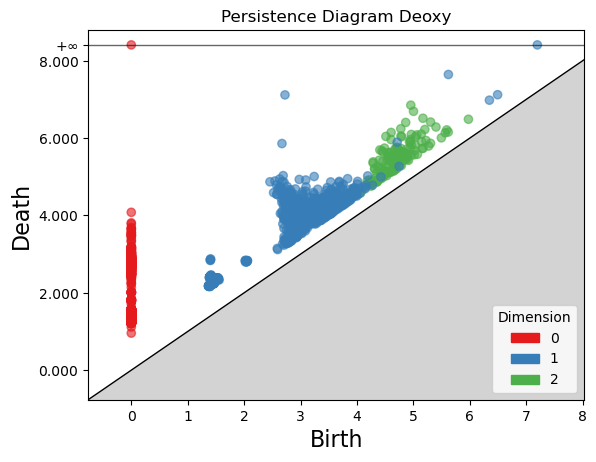

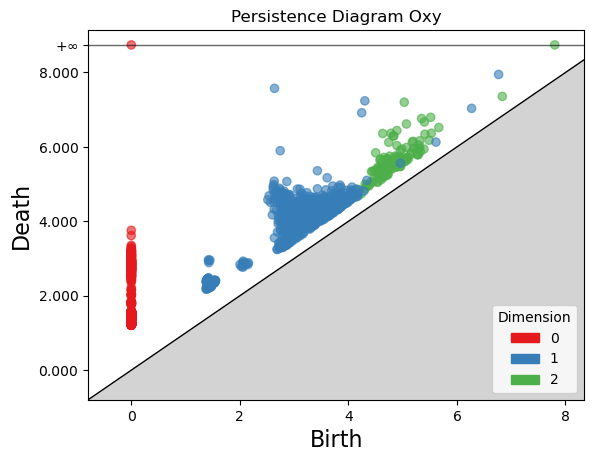

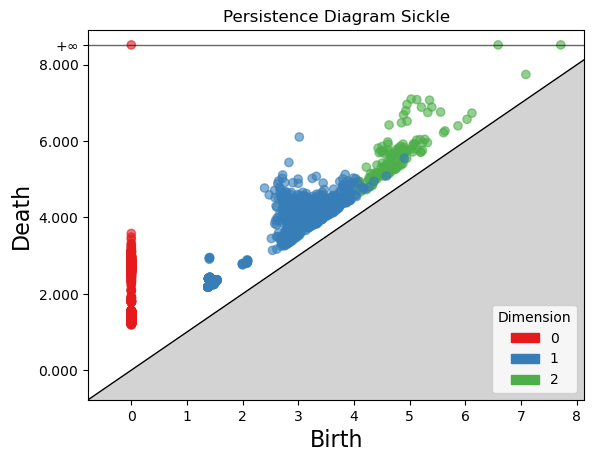

In [9]:
# create persistence diagrams (3 dimensions)
gudhi.plot_persistence_diagram(deoxy_diagram)
plt.title("Persistence Diagram Deoxy")

gudhi.plot_persistence_diagram(oxy_diagram)
plt.title("Persistence Diagram Oxy")

gudhi.plot_persistence_diagram(sickle_diagram)
plt.title("Persistence Diagram Sickle")

Text(0.5, 1.0, 'Persistence Barcode Sickle')

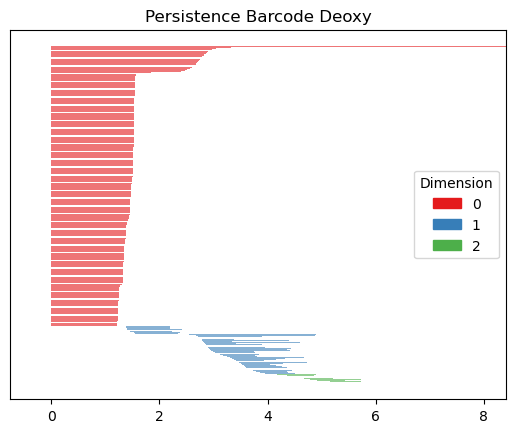

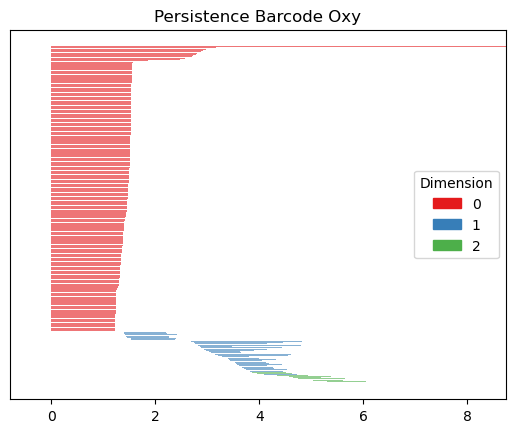

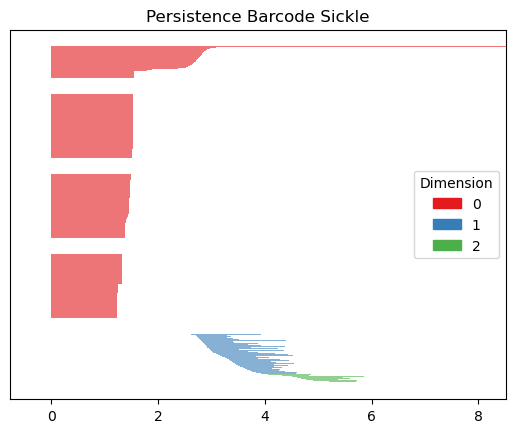

In [10]:
# create persistence barcodes (3 dimensions)
gudhi.plot_persistence_barcode(deoxy_diagram)
plt.title("Persistence Barcode Deoxy")

gudhi.plot_persistence_barcode(oxy_diagram)
plt.title("Persistence Barcode Oxy")

gudhi.plot_persistence_barcode(sickle_diagram)
plt.title("Persistence Barcode Sickle")

In [24]:
# Bottleneck Distances
def bottleneck_distances(d1, d2, p=False, d1_name="", d2_name=""):
    distances = []
    for i in range(3):
        d1_pairs = np.array([pair for dim, pair in d1 if dim == i])
        d2_pairs = np.array([pair for dim, pair in d2 if dim == i])
        # get rid of inf values
        d1_noinf = d1_pairs[~np.isinf(d1_pairs).any(axis=1)]
        d2_noinf = d2_pairs[~np.isinf(d2_pairs).any(axis=1)]
        distances.append(gudhi.bottleneck_distance(d1_noinf, d2_noinf))
    if p == True:
        print(f"Bottleneck distances between {d1_name} and {d2_name}:")
        for i in range(3):
            print(f"\tDimension {i}:", distances[i])
    return distances

bottleneck_sickle_deoxy = bottleneck_distances(deoxy_diagram, sickle_diagram, p=True, d1_name="deoxy hemoglobin", d2_name="sicklecell hemoglobin")
bottleneck_sickle_deoxy = bottleneck_distances(deoxy_diagram, oxy_diagram, p=True, d1_name="deoxy hemoglobin", d2_name="oxygenated hemoglobin")

Bottleneck distances between deoxy hemoglobin and sicklecell hemoglobin:
	Dimension 0: 0.9045377586334697
	Dimension 1: 1.0123346525263859
	Dimension 2: 0.5816221064510927
Bottleneck distances between deoxy hemoglobin and oxygenated hemoglobin:
	Dimension 0: 1.1531208509536515
	Dimension 1: 1.318692682791136
	Dimension 2: 0.34978208962960977
